4.3.1: Introduction to Network Analysis

In [1]:
'''
Network: real word object - like road network
graph : abstract mathematical representation of the network
    nodes/vertices
        degree of vertex : no of vertex attached
    links/edges - has 2 vertices (1 vertex neighbor pf vertex 2)
    
    disconnected / connected graph - every vertex is rechable from every vertex within the graph
    disconnected graph - graph into component which cant be connected 
        -largest component
    
    directed graph / undirected
    
    path : 
        sequence of unique vertices  such that any 2 vertices connected to each other by edge
        sequence of edge connecting two nodes
        length : no of edges involved within the path (shortest path)
'''

'\nNetwork: real word object - like road network\ngraph : abstract mathematical representation of the network\n    nodes/vertices\n        degree of vertex : no of vertex attached\n    links/edges - has 2 vertices (1 vertex neighbor pf vertex 2)\n    \n    disconnected / connected graph - every vertex is rechable from every vertex within the graph\n    disconnected graph - graph into component which cant be connected \n        -largest component\n    \n    directed graph / undirected\n    \n    path : \n        sequence of unique vertices  such that any 2 vertices connected to each other by edge\n        sequence of edge connecting two nodes\n        length : no of edges involved within the path (shortest path)\n'

4.3.2 Basics Of NetworkX

In [2]:
import networkx as nx

In [3]:
G = nx.Graph()

In [4]:
G

In [5]:
#add one node to the Graph
G.add_node(1)

In [6]:
#add many nodes to the Graph
G.add_nodes_from([2,3])

In [7]:
#similar add many nodes but no numbers
G.add_nodes_from(["u", "v"])

In [8]:
#examine the graph
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [9]:
#adding one edge
G.add_edge(1,2)
G.add_edge('u','v')

In [10]:
#adding many edges
#we can add an edge even if the underlging nodes doesn't not exist
#python adds those nodes automatically
G.add_edges_from([(1,3),(1,4),(1,5),(1,6) ])
G.add_edge("u","w")

In [11]:
#examine the edges
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [12]:
#remove one node
G.remove_node(2)
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [13]:
#remove multiple nodes
G.remove_nodes_from([4,5])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [14]:
#remove a single edge
G.remove_edge(1,3)
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [15]:
#remove multiple edges
G.remove_edges_from([(1,2),('u', 'v')])
G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [16]:
#number of nodes
G.number_of_nodes()

6

In [17]:
#number of edges
G.number_of_edges()

2

4.3.3 Graph Visualization

In [19]:
'''
Karate club graph dataset
nodes - members
edges - friendship between members
'''
G =nx.karate_club_graph()

In [20]:
import matplotlib.pyplot as plt

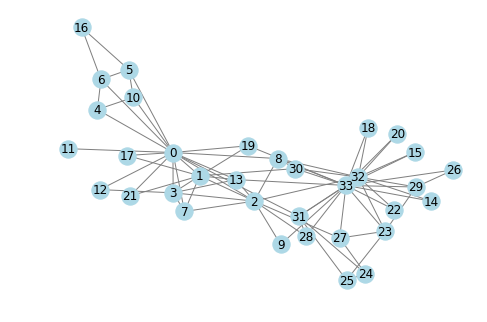

In [21]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="Grey") #labels visible inside nodes

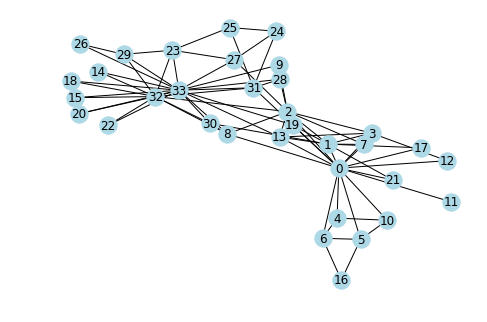

In [22]:
nx.draw(G, with_labels = 'True', node_color = 'lightblue', edge = 'grey')
plt.savefig('networks_info karate.pdf')
plt.show(G.nodes(), G.edges())

In [25]:
'''
Degrees of node in dictionary, keys - node id, values - degrees
'''
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [26]:
G.degree()[33] #dictionary

17

In [27]:
#alternitavely
#the argument is the node which degree we would like to find out
G.degree(33) #function

17

In [28]:
G.number_of_nodes()

34

In [29]:
G.number_of_edges()

78

In [30]:
G.degree(0) is G.degree()[0] 

True

4.3.4 Random Graphs

In [31]:
'''
Like random numbers - Random graphs
Erdos-Renyi (ER graph)
    N - Number of nodes in the graph
    P - Probability for any pair of node to be connected by an edge
    
        small p - graph is sparsely connected
        large P - graph is densely connecetd
'''

'\nLike random numbers - Random graphs\nErdos-Renyi (ER graph)\n    N - Number of nodes in the graph\n    P - Probability for any pair of node to be connected by an edge\n    \n        small p - graph is sparsely connected\n        large P - graph is densely connecetd\n'

In [32]:
from scipy.stats import bernoulli
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
#generate 1 single realization
#p prob of success
bernoulli.rvs(p=0.2)

0

In [34]:
bernoulli.rvs(p=0.2)

0

In [35]:
bernoulli.rvs(p=0.2)

0

In [39]:
for i in range(0,20):
    print(bernoulli.rvs(0.2))

0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
1


In [41]:
'''
ER graph generator
'''

N = 20
p = 0.2
#create an empty graph
G = nx.Graph()
#add all nodes in the graph
G.add_nodes_from(range(N))
#loop over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p): #if bernoulli.rvs(p=p) == True:
            #add an edge with prob p
            G.add_edge(node1, node2)

In [42]:
G.number_of_nodes()

20

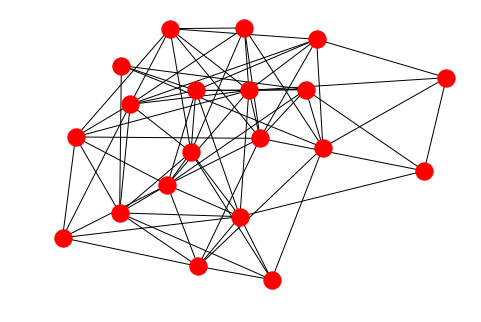

In [43]:
nx.draw(G)

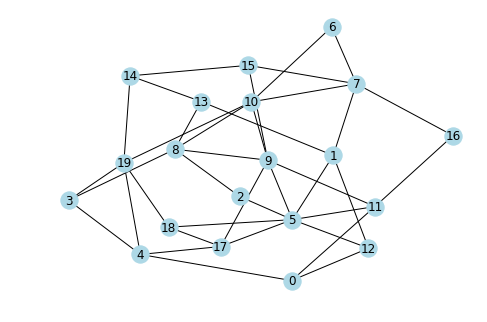

In [44]:

p = 0.2
#create an empty graph
G = nx.Graph()
#add all nodes in the graph
G.add_nodes_from(range(N))
#loop over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        #print(node1, node2, bernoulli.rvs(p=p))
        if node1 < node2 and bernoulli.rvs(p=p): #(1,10)=(10,1) graph is undirected so should be eliminated
            #add an edge with prob p
            G.add_edge(node1, node2)

nx.draw(G, with_labels = 'True', node_color = 'lightblue', edge = 'grey')
plt.show()

In [45]:
def er_graph(N,p):
    '''
    Generate an ER graph
    '''
    G = nx.Graph()
    #add all nodes in the graph
    G.add_nodes_from(range(N))
    #loop over all pairs of nodes
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                
                #add an edge with prob p
                G.add_edge(node1, node2)
    return G

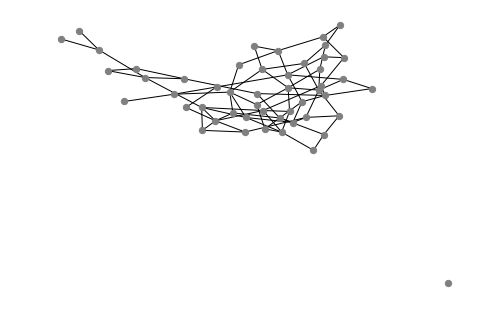

In [46]:
nx.draw(er_graph(50, 0.08), node_size = 40, node_color = 'gray')
plt.savefig('networks_info_er1.pdf')
plt.show()

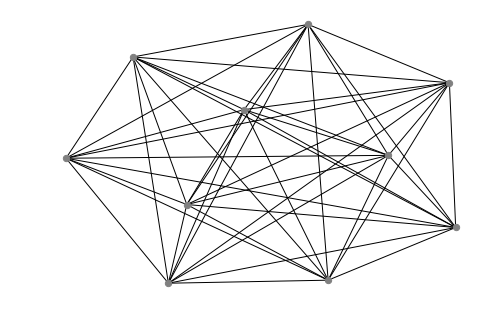

In [48]:
nx.draw(er_graph(10 ,1), node_size = 40, node_color = 'gray')
plt.savefig('networks_info by er1.pdf')
plt.show()

In [49]:
G.degree()

DegreeView({0: 3, 1: 4, 2: 2, 3: 3, 4: 4, 5: 7, 6: 2, 7: 5, 8: 5, 9: 6, 10: 5, 11: 4, 12: 3, 13: 3, 14: 3, 15: 3, 16: 2, 17: 4, 18: 3, 19: 5})

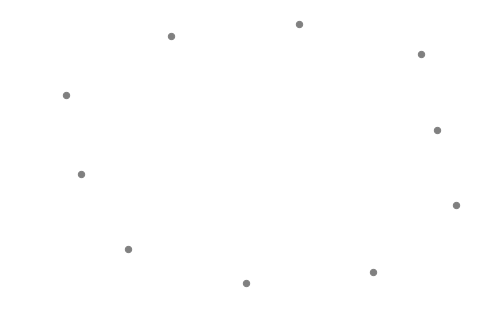

In [50]:
nx.draw(er_graph(10 ,0), node_size = 40, node_color = 'gray')
plt.savefig('networks_info by er1.pdf')
plt.show()

In [63]:
G.degree()

DegreeView({0: 3, 1: 2, 2: 4, 3: 0, 4: 2, 5: 4, 6: 6, 7: 5, 8: 7, 9: 4, 10: 4, 11: 2, 12: 3, 13: 3, 14: 2, 15: 3, 16: 4, 17: 1, 18: 3, 19: 1, 20: 4, 21: 5, 22: 3, 23: 5, 24: 2, 25: 3, 26: 2, 27: 5, 28: 5, 29: 2, 30: 3, 31: 1, 32: 3, 33: 7, 34: 2, 35: 2, 36: 8, 37: 2, 38: 6, 39: 6, 40: 6, 41: 4, 42: 2, 43: 1, 44: 2, 45: 1, 46: 3, 47: 4, 48: 2, 49: 2})

In [52]:
#How many components do you expect in an Erdős-Rényi graph with n=10 and p=1 ? 
# -> 1, p=1 means an edge exists between each node pair making the network consist of one component

In [53]:
#How many components do you expect in an Erdős-Rényi graph with n=10 and p=0 ? 
# -> 0

In [68]:
type(G.degree()) #G.degree() now returns a DegreeView object rather than a dictionary.

networkx.classes.reportviews.DegreeView

4.3.5 Plotting the degree distribution

In [69]:
def plot_degree_distribution(G):
    '''
    Plot the distribution of a network
    '''
    degree_sequence = [d for n, d in G.degree()] 
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel = ('Degree $K$')
    plt.ylabel = ('$P(k)$')
    plt.title('Degree Distribution')

In [70]:
G = er_graph(50,0.08)

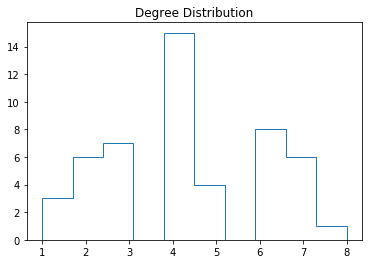

In [71]:
plot_degree_distribution(G)
plt.savefig("hist_graph_degree_distribution.pdf")
plt.show()

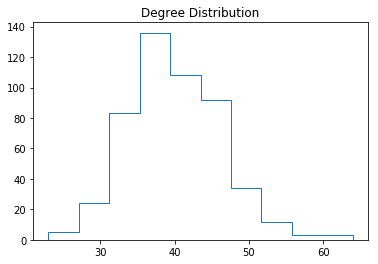

In [72]:
G = er_graph(500,0.08)
plot_degree_distribution(G)
plt.savefig("hist2_graph_degree_distribution.pdf")
plt.show()

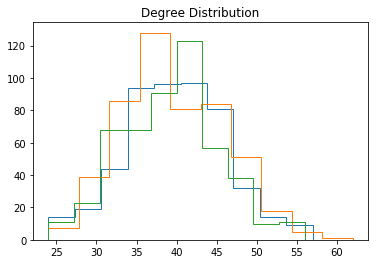

In [73]:
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)
plt.savefig("hist3_graph_degree_distribution.pdf")
plt.show()

TypeError: '<' not supported between instances of 'dict' and 'float'

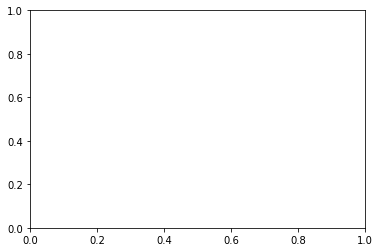

In [75]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

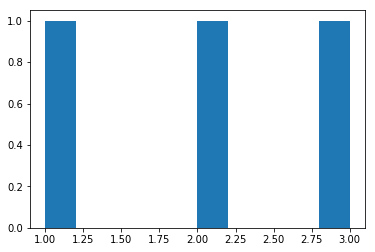

In [74]:
D = {1:1, 2:2, 3:3}
plt.hist(list(D.values()))
plt.show()

In [76]:
#How do the degree distributions in nx.erdos_renyi_graph(100, 0.03) and nx.erdos_renyi_graph(100, 0.30) compare?

#->The latter distribution has a greater mean on average.
#The former distribution has a greater mean on average.
#The means are approximately the same

4.3.6 - Descriptive Statistics Of Empirical Social Networks

In [77]:
'''
Data set - https://science.sciencemag.org/content/341/6144/1236498.full
Adjacency matrix - nXn matrix - if edge present then 1,  alsen 0
undirected graphs - symetric (i,j) = (j,i)
'''

'\nAdjacency matrix - nXn matrix - if edge present then 1,  alsen 0\nundirected graphs - symetric (i,j) = (j,i)\n'

In [78]:
import numpy as np

In [79]:
A1 = np.loadtxt('python_case_studies/Social Network/adj_allVillageRelationships_vilno_1.csv', delimiter = ',')

In [80]:
A2 = np.loadtxt('python_case_studies/Social Network/adj_allVillageRelationships_vilno_2.csv', delimiter = ',')

In [81]:
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [84]:
# To get the basic scene of a network size and number of connections, 
# count the the number of nodes and the number of edges in the netwoerks

def basic_net_stats(G):
    '''
    Count the the number of nodes and the number of edges of a network
    Give the average
    '''
    print('Number of nodes is: %d' % G.number_of_nodes())
    print('Number of edfes is: %d' % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [85]:
basic_net_stats(G1)

Number of nodes is: 843
Number of edfes is: 3405
Average degree: 8.08


In [86]:
basic_net_stats(G2)

Number of nodes is: 877
Number of edfes is: 3063
Average degree: 6.99


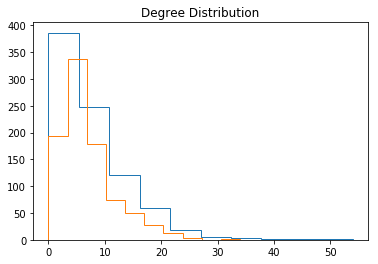

In [87]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig('networks_info_villages_hist.pdf')
plt.show()


4.3.7 - Finding The Largest Connected Component

In [88]:
#extract components in graph
nx.connected_component_subgraphs(G1) #generator do not return single object instead returns sequence of object

<generator object connected_component_subgraphs at 0x000000000AE58780>

In [89]:
gen = nx.connected_component_subgraphs(G1)

In [90]:
g = gen.__next__() #generaet next object
# Returns the next value in X , if it exists

In [91]:
type(g)

networkx.classes.graph.Graph

In [92]:
g.number_of_nodes()

825

In [93]:
g.number_of_edges()

3386

In [94]:
len(gen.__next__()) 

3

In [95]:
len(gen.__next__())

3

In [96]:
len(gen.__next__())

4

In [97]:
len(G1)

843

In [98]:
G1.number_of_nodes()

843

In [99]:
len(gen.__next__())

2

In [100]:
#LCC Largest connected component 
#call next implicitely
G1_LCC = max(nx.connected_component_subgraphs(G1), key = len) 
G2_LCC = max(nx.connected_component_subgraphs(G2), key = len)

In [101]:
len(G1_LCC) #len(G) - The number of nodes

825

In [102]:
G1_LCC.number_of_nodes()

825

In [103]:
len(G2_LCC)

810

In [104]:
G2_LCC.number_of_nodes()

810

In [ ]:
# compute the propotion of nodes that lie in 
# the largest connected components for the graphs

In [105]:
G1_LCC.number_of_nodes()/G1.number_of_nodes()

0.9786476868327402

In [106]:
G2_LCC.number_of_nodes()/G2.number_of_nodes()

0.9236031927023945

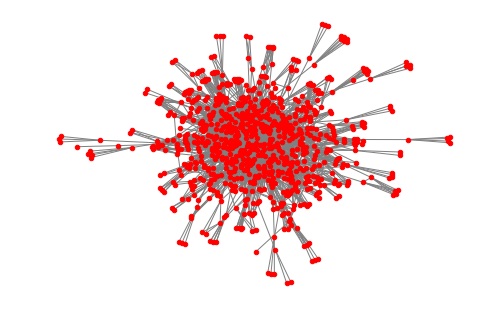

In [107]:
plt.figure()
nx.draw(G1_LCC, node_color = "red", edge_color = "gray", node_size = 20)
plt.savefig('networks_info_village_1.pdf')
plt.show()

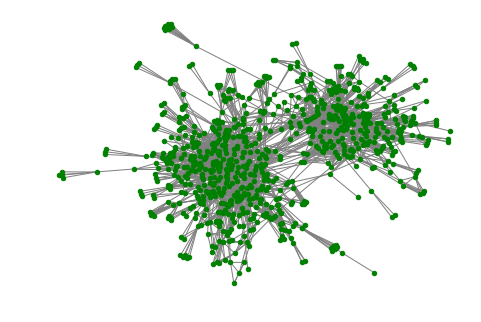

In [108]:
plt.figure()
nx.draw(G2_LCC, node_color = "green", edge_color = "gray", node_size = 20)
plt.savefig('networks_info_village_2.pdf')
plt.show()

In [109]:
# Which graph contains the largest connected component? G1
# Which graph contains the greatest fraction of its nodes in its largest connected component? G1